In [1]:
from reidemeister_moves import *

In [2]:
# %pip install "regina>=7.0"
import regina

# Khovanov Homology of Non-Orientable Surfaces

TODO: 
- Write functions for applying reidemeister moves
- Write function for band attachment

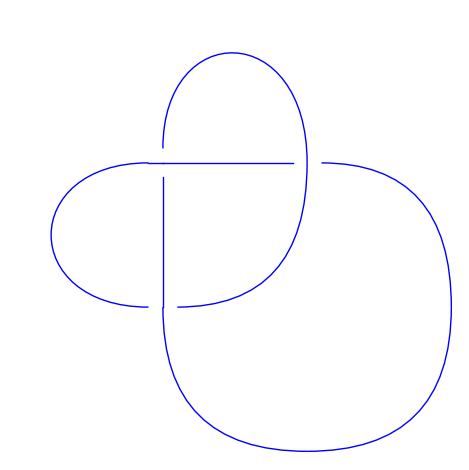

In [12]:
K = KnotInfo.K3_1.link()
K.plot()

Perform some Reidemeister moves.

r1 performed


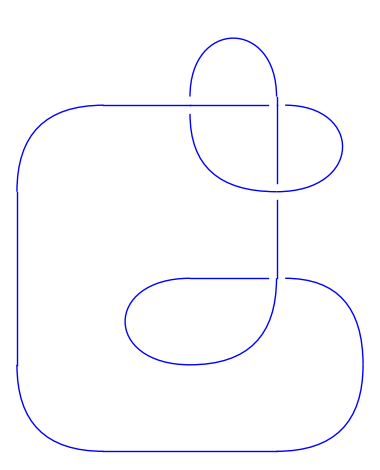

In [13]:
K_prime = R1(K,0)
K_prime.plot()

In [14]:
kh = K.khovanov_homology()
kh

{1: {0: Z},
 3: {0: Z, 1: 0, 2: 0, 3: 0},
 5: {0: 0, 1: 0, 2: Z, 3: 0},
 7: {2: 0, 3: C2},
 9: {3: Z}}

In [6]:
from sage.homology.homology_group import HomologyGroup
HomologyGroup(1,ZZ,[2])

C2

In [7]:
HomologyGroup(1,ZZ)

Z

In [8]:
def kh_coeffs(hom):
    hgrads = hom.keys()
    qgrads = {x
             for c in hom.keys()}
    min_hgrad, max_hgrad = min(hom.keys()), max(hom.keys())
    min_qgrad, max_qgrad = min([min(cs.keys()) for cs in hom.values()]), max([max(cs.keys()) for cs in hom.values()])

    coeffs = [[hom[h][i] if i in hom[h].keys() else 0 for i in range(min_qgrad, max_qgrad+1)] for h in hom.keys()]
    coeffs.insert(0, list(range(min_qgrad,max_qgrad+1)))
    for h, (i, row) in zip(['h\\setminus q'] + list(hom.keys()), enumerate(coeffs)):
        coeffs[i] = [h] + row
    
    kh_table = table(coeffs, header_row=True, header_column=True)
    return latex(kh_table)

In [9]:
kh_coeffs(kh)

\begin{tabular}{l|lllllll}
h\setminus q & $-2$ & $-1$ & $0$ & $1$ & $2$ & $3$ & $4$ \\ \hline
$-5$ & $\ZZ$ & $0$ & $0$ & $0$ & $0$ & $0$ & $0$ \\
$-3$ & $0$ & $C_{2}$ & $0$ & $0$ & $0$ & $0$ & $0$ \\
$-1$ & $0$ & $\ZZ$ & $\ZZ \times \ZZ$ & $0$ & $0$ & $0$ & $0$ \\
$1$ & $0$ & $0$ & $\ZZ$ & $\ZZ \times C_{2}$ & $0$ & $0$ & $0$ \\
$3$ & $0$ & $0$ & $0$ & $\ZZ$ & $C_{2}$ & $0$ & $0$ \\
$5$ & $0$ & $0$ & $0$ & $0$ & $\ZZ$ & $\ZZ$ & $0$ \\
$7$ & $0$ & $0$ & $0$ & $0$ & $0$ & $0$ & $C_{2}$ \\
$9$ & $0$ & $0$ & $0$ & $0$ & $0$ & $0$ & $\ZZ$ \\
\end{tabular}

$$
\begin{tabular}{l|lllllll}
h\q & $-2$ & $-1$ & $0$ & $1$ & $2$ & $3$ & $4$ \\ \hline
$-5$ & $\ZZ$ & $0$ & $0$ & $0$ & $0$ & $0$ & $0$ \\
$-3$ & $0$ & $C_{2}$ & $0$ & $0$ & $0$ & $0$ & $0$ \\
$-1$ & $0$ & $\ZZ$ & $\ZZ \times \ZZ$ & $0$ & $0$ & $0$ & $0$ \\
$1$ & $0$ & $0$ & $\ZZ$ & $\ZZ \times C_{2}$ & $0$ & $0$ & $0$ \\
$3$ & $0$ & $0$ & $0$ & $\ZZ$ & $C_{2}$ & $0$ & $0$ \\
$5$ & $0$ & $0$ & $0$ & $0$ & $\ZZ$ & $\ZZ$ & $0$ \\
$7$ & $0$ & $0$ & $0$ & $0$ & $0$ & $0$ & $C_{2}$ \\
$9$ & $0$ & $0$ & $0$ & $0$ & $0$ & $0$ & $\ZZ$ \\
\end{tabular}
$$

In [10]:
def normal_euler_num(D, D_prime):
    return D_prime.writhe() - D.writhe()

In [11]:
K.writhe()

2